In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran

/home/ahmed/.conda/envs/db_book/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_dataset = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#Define some helper functions 
# to assign the size of training and test data we will take from MNIST dataset
def train_size(size):
    print ('Total Training Images in Dataset = ' + str(mnist_dataset.train.images.shape))
    print ('############################################')
    input_values_train = mnist_dataset.train.images[:size,:]
    print ('input_values_train Samples Loaded = ' + str(input_values_train.shape))
    target_values_train = mnist_dataset.train.labels[:size,:]
    print ('target_values_train Samples Loaded = ' + str(target_values_train.shape))
    return input_values_train, target_values_train

def test_size(size):
    print ('Total Test Samples in MNIST Dataset = ' + str(mnist_dataset.test.images.shape))
    print ('############################################')
    input_values_test = mnist_dataset.test.images[:size,:]
    print ('input_values_test Samples Loaded = ' + str(input_values_test.shape))
    target_values_test = mnist_dataset.test.labels[:size,:]
    print ('target_values_test Samples Loaded = ' + str(target_values_test.shape))
    return input_values_test, target_values_test

In [4]:
#Define a couple of helper functions for digit images visualization
def visualize_digit(ind):
    print(target_values_train[ind])
    target = target_values_train[ind].argmax(axis=0)
    true_image = input_values_train[ind].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (ind, target))
    plt.imshow(true_image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def visualize_mult_imgs_flat(start, stop):
    imgs = input_values_train[start].reshape([1,784])
    for i in range(start+1,stop):
        imgs = np.concatenate((imgs, input_values_train[i].reshape([1,784])))
    plt.imshow(imgs, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [26]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([0.11634309, 0.10579926, 0.7778576 ], dtype=float32)

In [5]:
input_values_train, target_values_train = train_size(55000)

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (55000, 784)
target_values_train Samples Loaded = (55000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


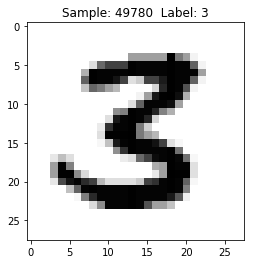

In [6]:
visualize_digit(ran.randint(0, input_values_train.shape[0]))

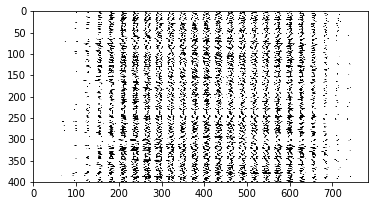

In [7]:
visualize_mult_imgs_flat(0,400)

In [8]:
#Defining the session variable that will be responsible for running the computational graph that we will define below
sess = tf.Session()

input_values = tf.placeholder(tf.float32, shape=[None, 784])
output_values = tf.placeholder(tf.float32, shape=[None, 10])

weights = tf.Variable(tf.zeros([784,10]))
biases = tf.Variable(tf.zeros([10]))

softmax_layer = tf.nn.softmax(tf.matmul(input_values,weights) + biases)

print(softmax_layer)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [9]:
input_values_train, target_values_train = train_size(3)
sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:
#sess.run(tf.initialize_all_variables())
print(sess.run(softmax_layer, feed_dict={input_values: input_values_train}))

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (3, 784)
target_values_train Samples Loaded = (3, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


In [10]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([0.11634309, 0.10579926, 0.7778576 ], dtype=float32)

In [11]:
model_cross_entropy = tf.reduce_mean(-tf.reduce_sum(output_values * tf.log(softmax_layer), reduction_indices=[1]))

In [12]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]
k = [0,0,0,1,0,0,0,0,0,0]
-np.log(j)
-np.multiply(np.log(j),k)
k = [0,0,1,0,0,0,0,0,0,0]
np.sum(-np.multiply(np.log(j),k))



4.605170185988091

In [14]:
input_values_train, target_values_train = train_size(5500)
input_values_test, target_values_test = test_size(10000)
learning_rate = 0.1
num_iterations = 2500

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (5500, 784)
target_values_train Samples Loaded = (5500, 10)
Total Test Samples in MNIST Dataset = (10000, 784)
############################################
input_values_test Samples Loaded = (10000, 784)
target_values_test Samples Loaded = (10000, 10)


In [15]:
init = tf.global_variables_initializer()
#If using TensorFlow prior to 0.12 use:
#init = tf.initialize_all_variables()
sess.run(init)

In [16]:
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(model_cross_entropy)
model_correct_prediction = tf.equal(tf.argmax(softmax_layer,1), tf.argmax(output_values,1))
model_accuracy = tf.reduce_mean(tf.cast(model_correct_prediction, tf.float32))

In [17]:
for i in range(num_iterations+1):
    sess.run(train, feed_dict={input_values: input_values_train, output_values: target_values_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(model_accuracy, feed_dict={input_values: input_values_test, output_values: target_values_test})) + '  Loss = ' + str(sess.run(model_cross_entropy, {input_values: input_values_train, output_values: target_values_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1881988
Training Step:100  Accuracy =  0.8647  Loss = 0.58029664
Training Step:200  Accuracy =  0.879  Loss = 0.45982164
Training Step:300  Accuracy =  0.8866  Loss = 0.40857208
Training Step:400  Accuracy =  0.8904  Loss = 0.37808096
Training Step:500  Accuracy =  0.8943  Loss = 0.35697535
Training Step:600  Accuracy =  0.8974  Loss = 0.34104997
Training Step:700  Accuracy =  0.8984  Loss = 0.32834956
Training Step:800  Accuracy =  0.9  Loss = 0.31782663
Training Step:900  Accuracy =  0.9005  Loss = 0.30886236
Training Step:1000  Accuracy =  0.9009  Loss = 0.3010645
Training Step:1100  Accuracy =  0.9023  Loss = 0.29417014
Training Step:1200  Accuracy =  0.9029  Loss = 0.28799513
Training Step:1300  Accuracy =  0.9033  Loss = 0.28240603
Training Step:1400  Accuracy =  0.9039  Loss = 0.27730304
Training Step:1500  Accuracy =  0.9048  Loss = 0.27260992
Training Step:1600  Accuracy =  0.9057  Loss = 0.26826677
Training Step:1700  Accuracy =  

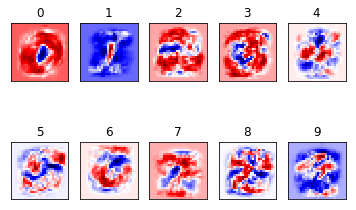

In [25]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(weights)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (1, 784)
target_values_train Samples Loaded = (1, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


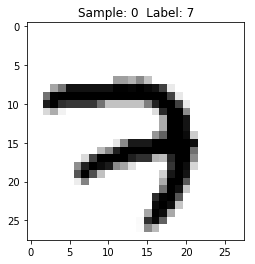

In [19]:
input_values_train, target_values_train = train_size(1)
visualize_digit(0)

In [20]:
answer = sess.run(softmax_layer, feed_dict={input_values: input_values_train})
print(answer)

[[2.1248012e-05 1.1646927e-05 8.9631692e-02 1.9201526e-02 8.2086492e-04
  1.2516821e-05 3.8538201e-05 8.5374612e-01 6.9188857e-03 2.9596921e-02]]


In [21]:
answer.argmax()

7

In [22]:
def display_result(ind):
    
    # Loading a training sample
    input_values_train = mnist_dataset.train.images[ind,:].reshape(1,784)
    target_values_train = mnist_dataset.train.labels[ind,:]
    
    # getting the label as an integer instead of one-hot encoded vector
    label = target_values_train.argmax()
    
    # Getting the prediction as an integer
    prediction = sess.run(softmax_layer, feed_dict={input_values: input_values_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(input_values_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

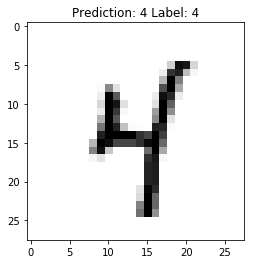

In [23]:
display_result(ran.randint(0, 55000))